In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display

pd.set_option('display.mpl_style', 'default')
plt.rcParams['figure.figsize'] = (150, 5)
plt.rcParams['font.family'] = 'sans-serif'
# Increase pandas width
pd.set_option('display.width', 190)
# Inline plots yay
%matplotlib inline

In [3]:
users_file = 'users.csv'
data = pd.read_csv(users_file, index_col='RESPID')

## Users AGE grouping

In [4]:
just_valid_age = data[data.AGE > 0]
just_valid_age['new_age'] = just_valid_age.AGE.apply(lambda x: int(x/10) )
pd.get_dummies(just_valid_age['new_age'], prefix="age")

/usr/local/lib/python2.7/dist-packages/IPython/kernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from IPython.kernel.zmq import kernelapp as app


,age_1,age_2,age_3,age_4,age_5,age_6,age_7,age_8,age_9
RESPID,,,,,,,,,
36927,0,0,0,0,0,1,0,0,0
3566,0,0,1,0,0,0,0,0,0
20054,0,0,0,0,1,0,0,0,0
41749,0,0,0,1,0,0,0,0,0
23108,1,0,0,0,0,0,0,0,0
42754,0,1,0,0,0,0,0,0,0
4596,0,0,0,0,1,0,0,0,0
40555,0,0,0,0,1,0,0,0,0
8673,0,0,0,1,0,0,0,0,0


In [5]:
data.head()

,GENDER,AGE,WORKING,REGION,MUSIC,LIST_OWN,LIST_BACK,Q1,Q2,Q3,...,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19
RESPID,,,,,,,,,,,,,,,,,,,,,
36927,Female,60,Other,South,Music is important to me but not necessarily m...,1 hour,NaN,49,50,49,...,50,50,71,52,71,9,7,72,49,26
3566,Female,36,Full-time housewife / househusband,South,Music is important to me but not necessarily m...,1 hour,1 hour,55,55,62,...,12,65,65,80,79,51,31,68,54,33
20054,Female,52,Employed 30+ hours a week,Midlands,I like music but it does not feature heavily i...,1 hour,Less than an hour,11,50,9,...,50,94,51,74,66,27,46,73,8,31
41749,Female,40,Employed 8-29 hours per week,South,Music means a lot to me and is a passion of mine,2 hours,3 hours,81,80,88,...,76,74,64,73,85,61,77,76,78,88
23108,Female,16,Full-time student,North,Music means a lot to me and is a passion of mine,3 hours,6 hours,76,79,78,...,56,13,82,79,68,71,NaN,86,80,32


# Without questions (for analysis with questions, see further down)

In [6]:
data = pd.read_csv(users_file, index_col='RESPID', usecols=['RESPID', 'GENDER', 'AGE', 'WORKING', 'REGION', 'MUSIC', 'LIST_OWN', 'LIST_BACK'])
data.head()

,GENDER,AGE,WORKING,REGION,MUSIC,LIST_OWN,LIST_BACK
RESPID,,,,,,,
36927,Female,60,Other,South,Music is important to me but not necessarily m...,1 hour,NaN
3566,Female,36,Full-time housewife / househusband,South,Music is important to me but not necessarily m...,1 hour,1 hour
20054,Female,52,Employed 30+ hours a week,Midlands,I like music but it does not feature heavily i...,1 hour,Less than an hour
41749,Female,40,Employed 8-29 hours per week,South,Music means a lot to me and is a passion of mine,2 hours,3 hours
23108,Female,16,Full-time student,North,Music means a lot to me and is a passion of mine,3 hours,6 hours


## General user statistics (sex, age...)

Female    50.371056
Male      49.628944
dtype: float64


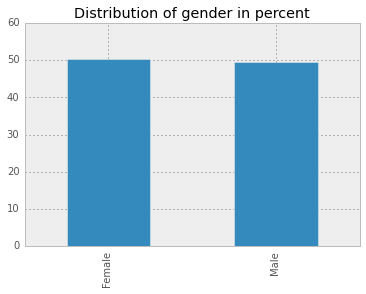

In [7]:
total_count = float(len(data['GENDER']))
gender_count = (data[ 'GENDER' ].value_counts() / total_count) * 100 
print(gender_count)


gender_count.plot(kind='bar', title='Distribution of gender in percent')

Youngest: 13.0
Oldest: 94.0


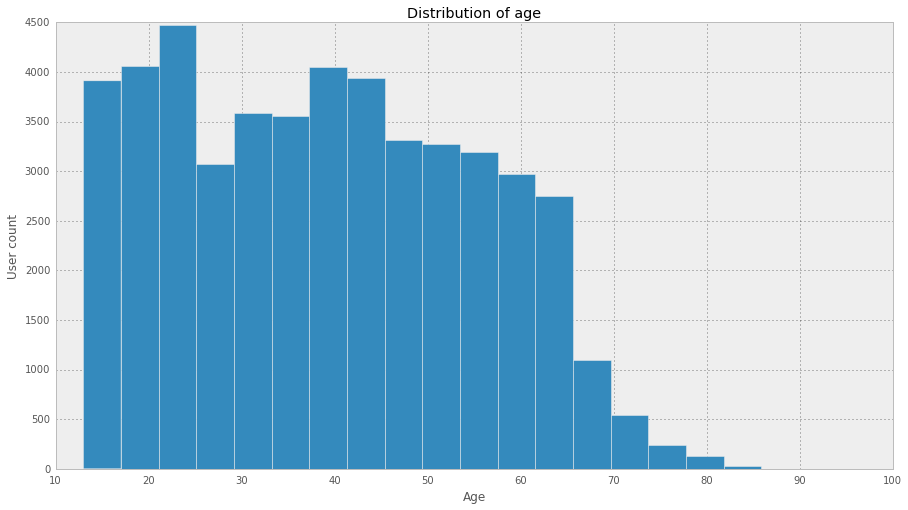

In [8]:
#x = data[['AGE']].groupby('AGE')
#x.AGE.count().plot(kind='hist')
print("Youngest: %s\nOldest: %s" % (data['AGE'].min(), data['AGE'].max()))
p = data['AGE'].hist(bins=20, figsize=(15,8))
p.set_xlabel("Age")
p.set_ylabel("User count")
p.set_title("Distribution of age")

In [9]:
fig = plt.figure(figsize=(16,8))

In [10]:
working = data[ 'WORKING' ]
working.unique()

array(['Other', 'Full-time housewife / househusband',
       'Employed 30+ hours a week', 'Employed 8-29 hours per week',
       'Full-time student', 'Temporarily unemployed',
       'Retired from full-time employment (30+ hours per week)', nan,
       'Self-employed', 'Retired from self-employment',
       'Prefer not to state', 'Part-time student',
       'In unpaid employment (e.g. voluntary work)',
       'Employed part-time less than 8 hours per week'], dtype=object)

In [11]:
working_values_counts = data['WORKING'].value_counts()
ax1 = fig.add_subplot(121)
ax1.set_ylabel('Amount of users with working status')
ax1.set_title("Distribution of working status among users")
working_values_counts.plot(ax=ax1, kind='bar', figsize=(15,5), fontsize=15)

In [12]:
# North Ireland is the same as Northern Ireland
data.loc[data['REGION'] == 'North Ireland' , 'REGION'] = 'Northern Ireland'

ax2 = fig.add_subplot(122)
ax2.set_ylabel("User count")
ax2.set_title("Distribution of users by region")

region = data['REGION']
p = region.value_counts().plot(ax=ax2, kind='bar', figsize=(15,5), fontsize=15)

['Music is important to me but not necessarily more important'
 'I like music but it does not feature heavily in my life'
 'Music means a lot to me and is a passion of mine'
 'Music has no particular interest for me'
 'Music is important to me but not necessarily more important than other hobbies or interests'
 'Music is no longer as important as it used to be to me']


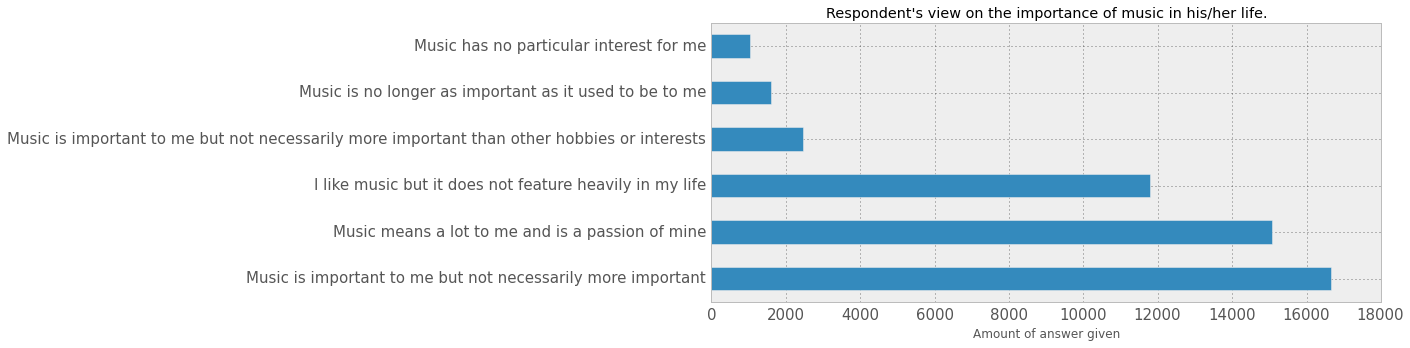

In [13]:
print(data['MUSIC'].unique())
p = data['MUSIC'].value_counts().plot(kind='barh', figsize=(12,5), fontsize=15)
p.set_xlabel("Amount of answer given")
p.set_title("Respondent's view on the importance of music in his/her life.")

<b>LIST_OWN</b> = An estimate for the number of daily hours spent listening to music they own or have chosen.
<br>
<b>LIST_BACK</b> = An estimate for the number of daily hours the respondent spends listening to background music/music they have not chosen. 

# seems not needed anymore
from re import sub
strip_letters = lambda val: sub(r'\D', '', val)

def strip_letters_def(string):
    # Strip everything but numbers (e.g. 5 hours -> 5)
    # Make copy first!
    df_copy = df.copy()
    df_copy = df_copy.replace(r'^\D*(\d+)\D*',r'\1', inplace=False, regex=True)
    return df_copy


Unique values in column:
['1 hour' '2 hours' '3 hours' '5 hours' nan '7 hours' 'Less than an hour'
 '0' '1' '8 hours' '5' '16 hours' '3' '2' '16+ hours' '8' '0 Hours'
 '6 hours' '4 hours' '4' '12 hours' '14 hours' '10 hours' '7' '15 hours'
 '6' '9 hours' '11 hours' '10' '12' '9' '13 hours' '15' '14'
 'More than 16 hours' '20' '13' '24' '16' '11' '22' '17' '18']
10946

Unique values after operations:
[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.  14.
  15.  16.  17.  18.  20.  22.  24.  nan]
0     10946
1     10653
2      9397
3      4269
4      2549
5      1454
6       846
7       341
8       572
9       135
10      537
11       57
12      233
13       30
14       56
15       63
16      558
17        1
18        1
20        6
22        1
24        1
dtype: int64


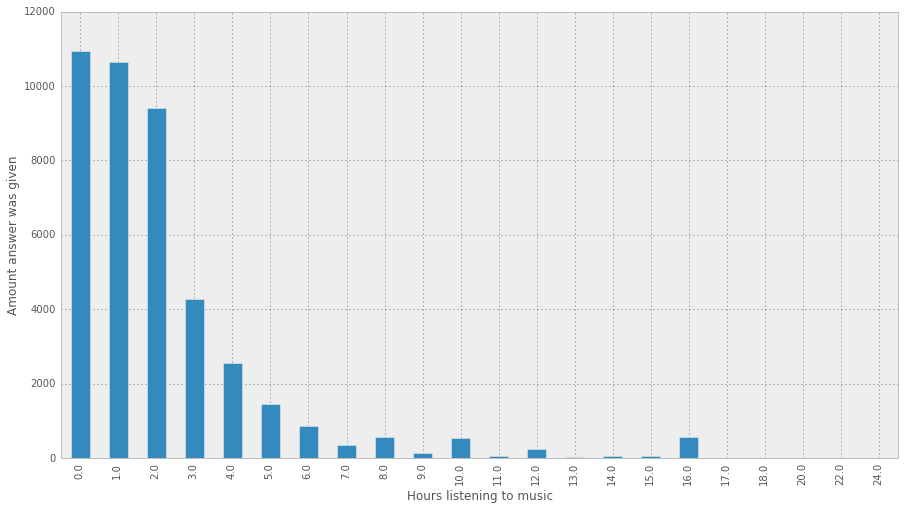

In [14]:
actively_listening_hours = data['LIST_OWN']
print("Unique values in column:")
print(actively_listening_hours.unique())
 
# Remove unwanted letters
# Watch out not to remove the NaNs
hour_replaced = actively_listening_hours.copy()
hour_replaced[hour_replaced == 'Less than an hour'] = 0
hour_replaced = hour_replaced.replace('[^\d]', '', regex=True)
# Convert to float now that all letters have been removed
hour_replaced = hour_replaced.convert_objects(convert_numeric=True)
hour_replaced.sort()

print(len(hour_replaced[hour_replaced == 0]))
print("\nUnique values after operations:")
print(hour_replaced.unique())
hours_listening_actively = hour_replaced.value_counts(sort=False)
print(hours_listening_actively)
p = hours_listening_actively.plot(kind='bar', figsize=(15,8))
p.set_ylabel("Amount answer was given")
p.set_xlabel("Hours listening to music")

Unique values in column:
[nan '1 hour' 'Less than an hour' '3 hours' '6 hours' '2 hours' '5 hours'
 '3' '0 Hours' '7' '0' '2' '6' '16+ hours' '8 hours' '4' '1' '4 hours' '5'
 '16 hours' '9 hours' '10 hours' '7 hours' '12 hours' '11 hours' '8' '10'
 '14 hours' '9' '15 hours' '12' '20' '16' 'More than 16 hours' '13 hours'
 '15' '18' '21' '14' '11' '19' '24']

Hours listening to music passively, aggregated:
0     9298
1     8392
2     8298
3     4584
4     3408
5     2154
6     1692
7      833
8     1480
9      381
10     768
11      96
12     369
13      50
14      95
15      92
16     804
18       5
19       5
20      13
21       1
24       2
dtype: int64


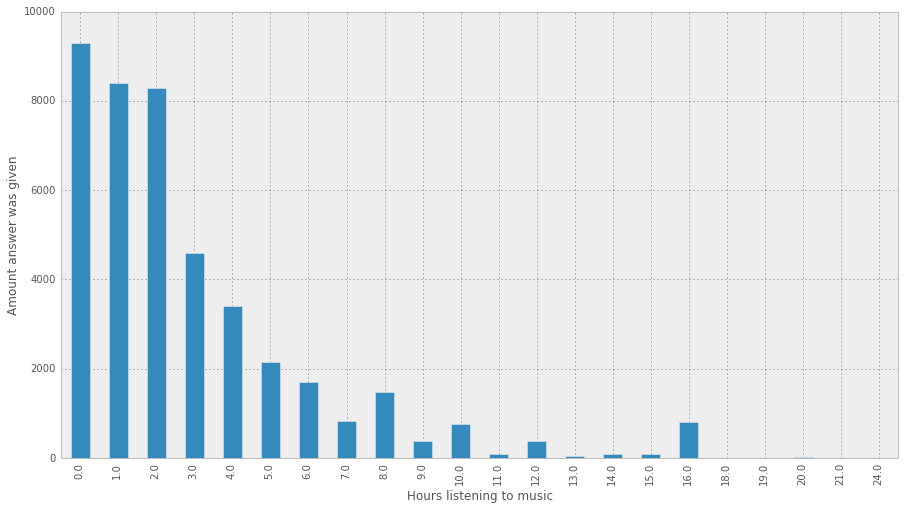

In [15]:
passively_listening = data['LIST_BACK'].copy()
print("Unique values in column:")
print(passively_listening.unique())

# Remove unwanted letters
passively_listening[passively_listening == 'Less than an hour'] = 0
passively_listening = passively_listening.replace('[^\d]', '', regex=True)
passively_listening = passively_listening.convert_objects(convert_numeric=True)

hours_listening_passively = passively_listening.value_counts(sort=False)
print("\nHours listening to music passively, aggregated:")
print(hours_listening_passively)
p = hours_listening_passively.plot(kind='bar', figsize=(15,8))
p.set_ylabel("Amount answer was given")
p.set_xlabel("Hours listening to music")

   Active  Passive
0   10946     9298
1   10653     8392
2    9397     8298
3    4269     4584
4    2549     3408


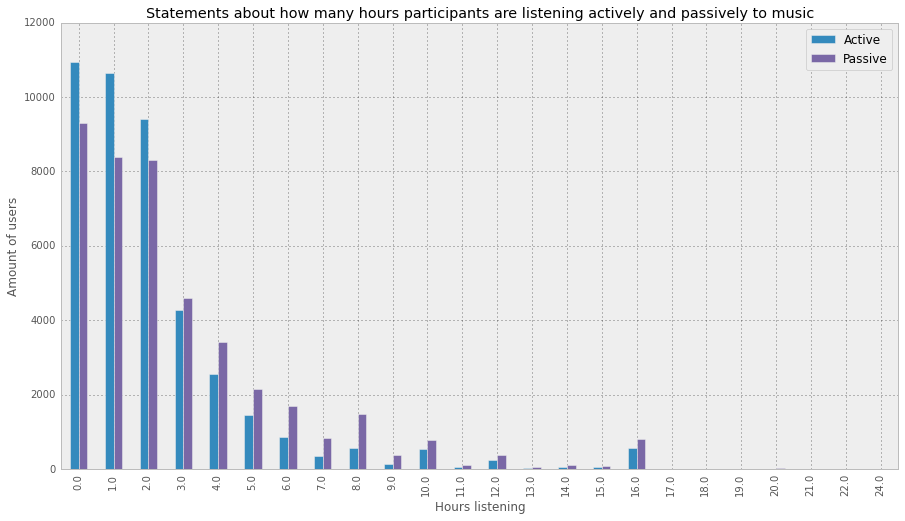

In [17]:
hours_listening = pd.DataFrame(data={"Active": hours_listening_actively, "Passive": hours_listening_passively})
print(hours_listening.head())
p = hours_listening.plot(kind='bar', figsize=(15,8))
p.set_xlabel("Hours listening")
p.set_ylabel("Amount of users")
p.set_title("Statements about how many hours participants are listening actively and passively to music")

     LIST_OWN
AGE          
13   2.637540
14   2.999074
15   3.179134
16   3.572016
17   3.730871
18   3.606848
19   3.384783
20   3.117647
21   3.236473
22   2.793855
23   2.571809
24   2.506329
25   2.623476
26   2.515942
27   2.508772
28   2.277372
29   2.170929
30   2.473171
31   2.018821
32   2.216279
33   2.161247
34   2.165722
35   2.104750
36   1.925161
37   2.085956
38   2.119183
39   1.890000
40   1.947078
41   1.791527
42   1.893471
..        ...
60   1.352159
61   1.402337
62   1.493610
63   1.355725
64   1.314972
65   1.500000
66   1.434109
67   1.303965
68   1.156250
69   1.190476
70   1.335616
71   1.081967
72   1.142857
73   1.142857
74   1.048387
75   1.285714
76   1.057143
77   1.741935
78   1.259259
79   1.680000
80   0.809524
81   0.500000
82   1.000000
83   0.333333
84   1.250000
85   0.600000
86   1.000000
87   1.000000
89   1.000000
94   1.000000

[77 rows x 1 columns]


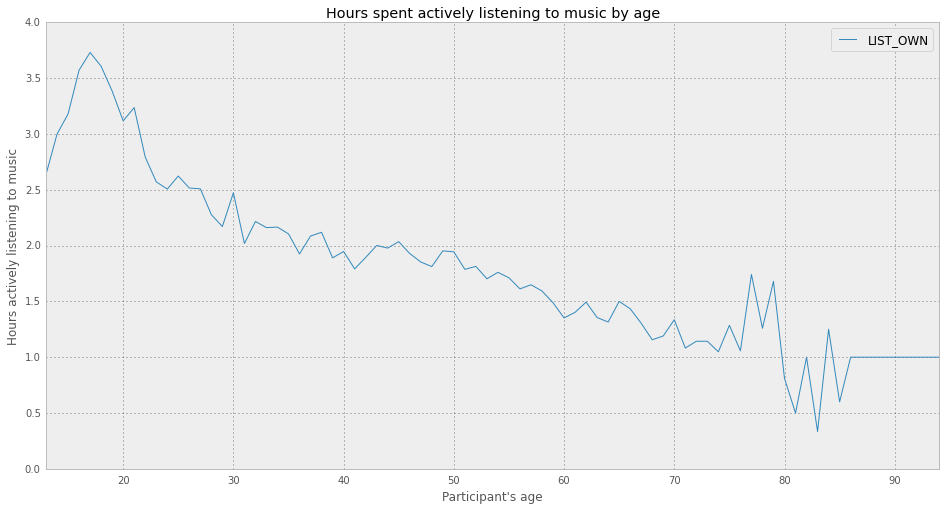

In [20]:
actively_listening_by_age = data[ ['AGE', 'LIST_OWN'] ]

listens_less_than_an_hour = actively_listening_by_age['LIST_OWN'] == 'Less than an hour'
actively_listening_by_age.loc[listens_less_than_an_hour, 'LIST_OWN'] = 0
actively_listening_by_age.loc[:, 'LIST_OWN'] = actively_listening_by_age['LIST_OWN'].replace('[^\d]', '', regex=True)

actively_listening_by_age = actively_listening_by_age.convert_objects(convert_numeric=True)

# Group by age and take mean value
average_time_listening_by_age = actively_listening_by_age.groupby('AGE').mean()
print(average_time_listening_by_age)
p = average_time_listening_by_age.plot(figsize=(16,8))
p.set_xlabel("Participant's age")
p.set_ylabel("Hours actively listening to music")
p.set_title("Hours spent actively listening to music by age")

     LIST_BACK
AGE           
13    2.186127
14    2.216535
15    2.211416
16    2.259740
17    2.450704
18    2.503713
19    2.901024
20    2.547798
21    2.746926
22    2.915237
23    2.919283
24    2.948655
25    3.060317
26    2.982379
27    3.114875
28    3.197015
29    3.077029
30    2.875616
31    3.073110
32    3.103609
33    2.964286
34    3.021038
35    3.036320
36    2.987437
37    3.069658
38    3.048478
39    3.077851
40    3.140984
41    3.039560
42    3.247492
43    3.244395
44    3.233930
45    3.145140
46    3.306122
47    3.081658
48    3.125000
49    3.102098
50    3.233196
51    2.933522
52    3.192412
53    3.015942
54    3.017173
55    3.145357
56    2.876119
57    2.739617
58    2.916918
59    2.700306
60    2.818466
61    2.589372
62    2.652308
63    2.677761
64    2.564384
65    2.766355
66    2.638596
67    2.840816
68    2.758794
69    2.413408
70    2.358108
71    2.511811
72    2.459184
           ...

[77 rows x 1 columns]


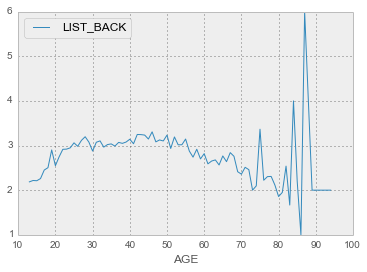

In [33]:
passively_listening_by_age = data[ ['AGE', 'LIST_BACK'] ]

listens_less_than_an_hour = passively_listening_by_age['LIST_BACK'] == 'Less than an hour'
passively_listening_by_age.loc[listens_less_than_an_hour, 'LIST_BACK'] = 0
passively_listening_by_age.loc[:, 'LIST_BACK'] = passively_listening_by_age['LIST_BACK'].replace('[^\d]', '', regex=True)

passively_listening_by_age = passively_listening_by_age.convert_objects(convert_numeric=True)

# Group by age and take mean value
average_time_passively_listening_by_age = passively_listening_by_age.groupby('AGE').mean()
print(average_time_passively_listening_by_age)
average_time_passively_listening_by_age.plot()

# With questions

### Questions Q1-Q19
<table>
    <tr>
        <th>Q</th>
        <th>Full question</th>
    <tr>
        <td>Q1</td>
        <td>I enjoy actively searching for and discovering music that I have never heard before</td> 
    </tr>
    <tr>
        <td>Q2</td>
        <td>I find it easy to find new music</td> 
    </tr>
    <tr>
        <td>Q3</td>
        <td>I am constantly interested in and looking for more music</td> 
    </tr>
    <tr>
        <td>Q4</td>
        <td>I would like to buy new music but I don’t know what to buy</td> 
    </tr>
    <tr>
        <td>Q5</td>
        <td>I used to know where to find music</td> 
    </tr>
    <tr>
        <td>Q6</td>
        <td>I am not willing to pay for music</td> 
    </tr>
    <tr>
        <td>Q7</td>
        <td>I enjoy music primarily from going out to dance</td> 
    </tr>
    <tr>
        <td>Q8</td>
        <td>Music for me is all about nightlife and going out</td> 
    </tr>
    <tr>
        <td>Q9</td>
        <td>I am out of touch with new music</td> 
    </tr>
    <tr>
        <td>Q10</td>
        <td>My music collection is a source of pride</td> 
    </tr>
    <tr>
        <td>Q11</td>
        <td>Pop music is fun</td> 
    </tr>
    <tr>
        <td>Q12</td>
        <td>Pop music helps me to escape</td> 
    </tr>
    <tr>
        <td>Q13</td>
        <td>I want a multi media experience at my fingertips wherever I go</td> 
    </tr>
    <tr>
        <td>Q14</td>
        <td>I love technology</td> 
    </tr>
    <tr>
        <td>Q15</td>
        <td>People often ask my advice on music - what to listen to</td> 
    </tr>
    <tr>
        <td>Q16</td>
        <td>I would be willing to pay for the opportunity to buy new music pre-release</td> 
    </tr>
    <tr>
        <td>Q17</td>
        <td>I find seeing a new artist / band on TV a useful way of discovering new music</td> 
    </tr>
    <tr>
        <td>Q18</td>
        <td>I like to be at the cutting edge of new music</td> 
    </tr>
    <tr>
        <td>Q19</td>
        <td>I like to know about music before other people </td> 
    </tr>
</table>

In [34]:
data = pd.read_csv(users_file, index_col='RESPID')
question_cols = ['Q1', "Q2", "Q3", "Q4", "Q5", "Q6", "Q7", "Q8", "Q9", "Q10", "Q11", "Q12", "Q13", "Q14", "Q15", "Q16", "Q17", "Q18", "Q19"]
questions = data[question_cols]
questions.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19
RESPID,,,,,,,,,,,,,,,,,,,
36927,49,50,49,50,32,33,32,0,74,50,50,71,52,71,9,7,72,49,26
3566,55,55,62,9,9,9,10,11,55,12,65,65,80,79,51,31,68,54,33
20054,11,50,9,8,45,10,30,29,8,50,94,51,74,66,27,46,73,8,31
41749,81,80,88,88,31,31,51,30,8,76,74,64,73,85,61,77,76,78,88
23108,76,79,78,73,71,68,73,67,31,56,13,82,79,68,71,NaN,86,80,32


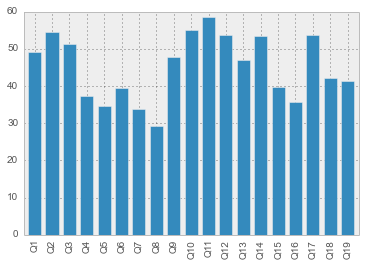

In [35]:
questions.mean().plot(kind='bar')


In [36]:
questions_with_age.head()

NameError: name 'questions_with_age' is not defined

In [ ]:
cols = ['AGE'] + question_cols
questions_with_age = data[ cols ].copy()
# Part users into age groups from young (13-29), adult (30-45), old (46-61), retired (62-77), dead(78-93) 
def to_age_group(age):
    if age <= 29:
        return "young"
    if age <= 45:
        return "adult"
    if age <= 61:
        return "old"
    if age <= 77:
        return "retired"
    return "dead

#questions_with_age.loc[questions_with_age['AGE'] <= 29, 'AGE'] = "young"
#questions_with_age['AGE'].map(to_age_group)
age_mapped = questions_with_age['AGE'].apply(to_age_group)
print(age_mapped)
questions_with_age['AGE'] = age_mapped
questions_with_age

In [1]:
questions_with_age[['AGE', 'Q3']].groupby('AGE').mean().plot()

NameError: name 'questions_with_age' is not defined